#Abraham Pardomuan Naiborhu
Dataset: Fashion Mnist

Course: Belajar Pengembangan Machine Learning

Platform: Dicoding.com

In [1]:
#Visualisasi data
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preporcessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#Kita train lah modelnya
import tensorflow as tf
from keras.callbacks import Callback

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("Train shape : "+str(x_train.shape))
print("Test shape : "+ str(x_test.shape))

Train shape : (60000, 28, 28)
Test shape : (10000, 28, 28)


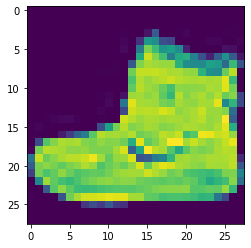

In [4]:
plt.imshow(x_train[0])

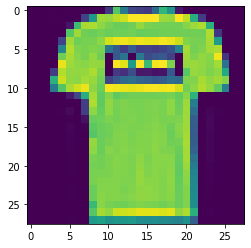

In [5]:
plt.imshow(x_train[1])

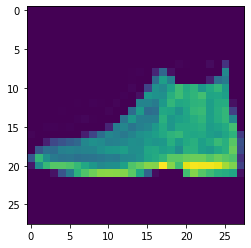

In [6]:
plt.imshow(x_test[0])

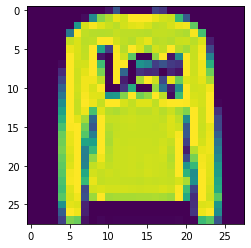

In [7]:
plt.imshow(x_test[1])

ValueError: ignored

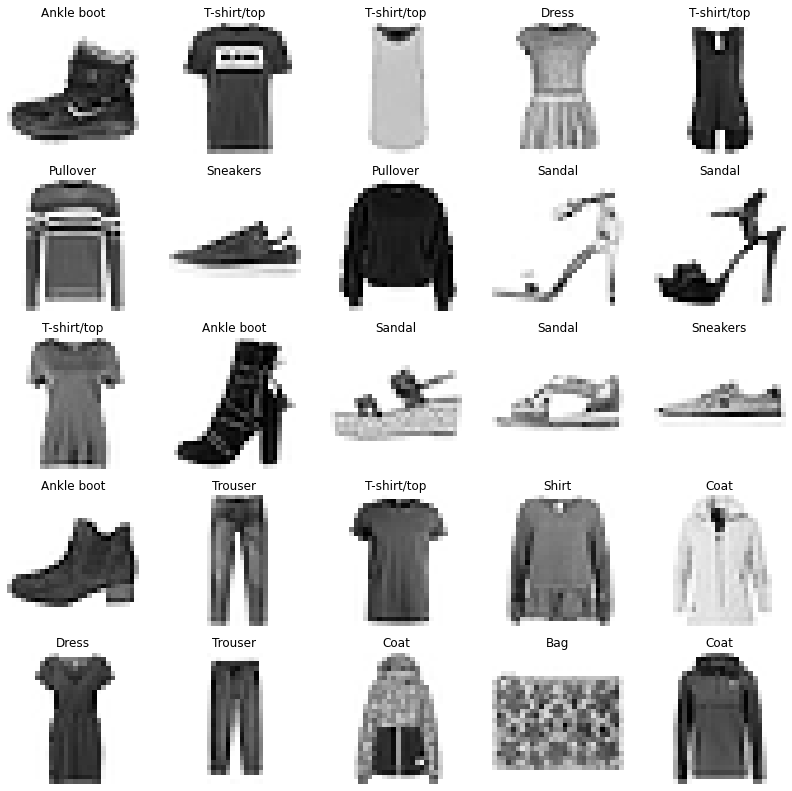

In [8]:
the_labels = ['T-shirt/top','Trouser',
              'Pullover','Dress','Coat',
              'Sandal','Shirt','Sneakers',
              'Bag','Ankle boot']

plt.figure(figsize=(14,14))

for i in range(0, 50):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap = 'Greys')
  plt.title(the_labels[y_train[i]])
  plt.axis('off')

plt.tight_layout()
plt.show()

ValueError: ignored

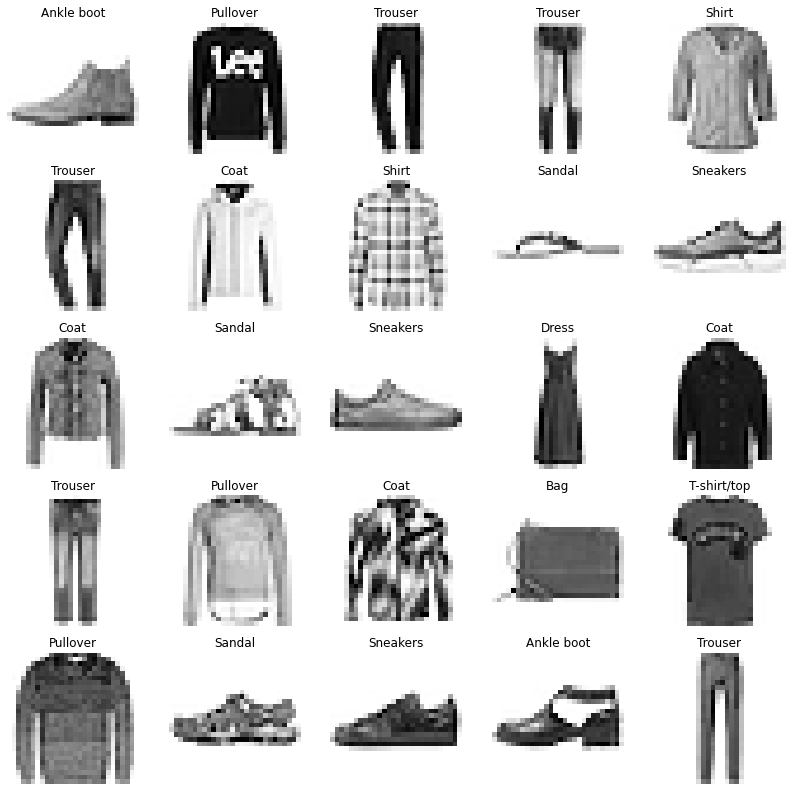

In [9]:
the_labels = ['T-shirt/top','Trouser',
              'Pullover','Dress','Coat',
              'Sandal','Shirt','Sneakers',
              'Bag','Ankle boot']

plt.figure(figsize=(14,14))

for i in range(0, 50):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_test[i], cmap = 'Greys')
  plt.title(the_labels[y_test[i]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
#Feature Scalling
x_train = x_train/225
x_test = x_test/225

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
print(str(x_train.shape) + " " +  str(y_train.shape) + "\n")
print(str(x_val.shape) + " " + str(y_val.shape) + "\n")

(48000, 28, 28, 1) (48000,)

(12000, 28, 28, 1) (12000,)



In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu', padding = 'same' , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation='relu', padding = 'same' , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu', padding = 'same' , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation='relu', padding = 'same' , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128,activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 256,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 128,activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units = 10,activation = 'softmax')  
   
])

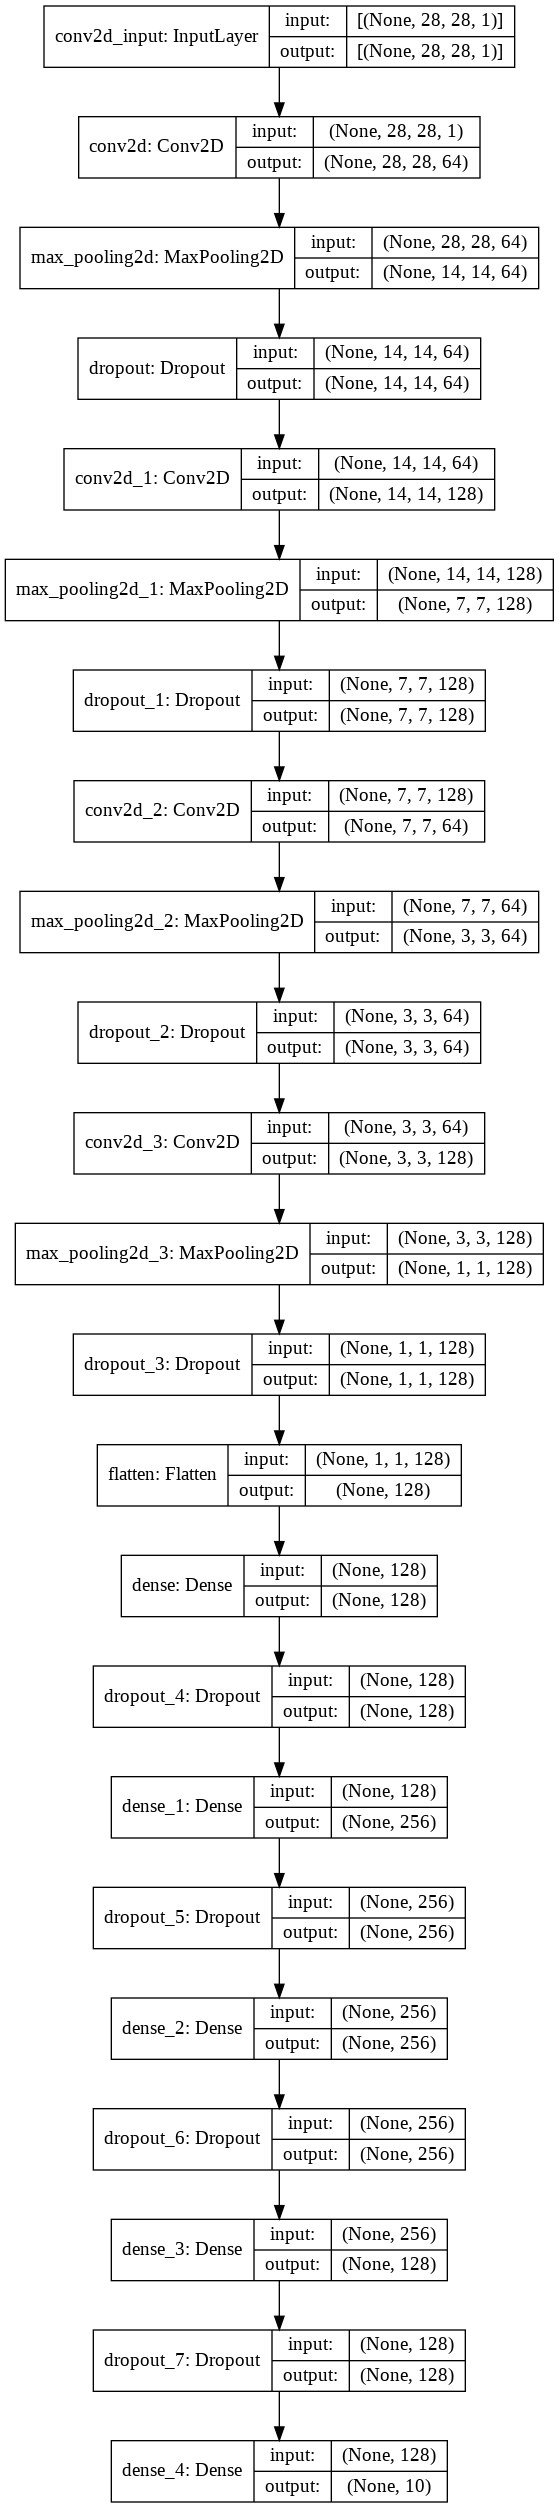

In [13]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          7

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      print("\nAkurasi sudah diatas minimum")
      self.model.stop_training = True
callbacks = myCallback()

In [17]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), callbacks=[callbacks], epochs=100)

Epoch 1/100
1500/1500 [==============================] - 56s 17ms/step - loss: 0.8641 - accuracy: 0.6721 - val_loss: 0.4838 - val_accuracy: 0.8130
Epoch 2/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.5199 - accuracy: 0.8156 - val_loss: 0.3764 - val_accuracy: 0.8594
Epoch 3/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.4543 - accuracy: 0.8428 - val_loss: 0.3703 - val_accuracy: 0.8638
Epoch 4/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.4272 - accuracy: 0.8518 - val_loss: 0.3202 - val_accuracy: 0.8835
Epoch 5/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.4074 - accuracy: 0.8567 - val_loss: 0.3097 - val_accuracy: 0.8889
Epoch 6/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3820 - accuracy: 0.8662 - val_loss: 0.2957 - val_accuracy: 0.8948
Epoch 7/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3742 - accuracy: 0.8687 - val_loss: 0

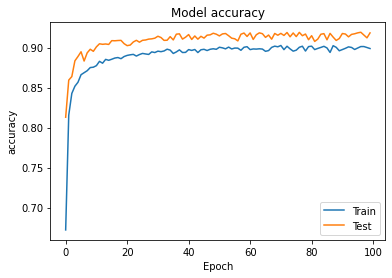

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

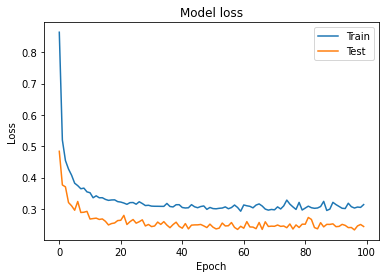

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp5boh9bvm/assets


INFO:tensorflow:Assets written to: /tmp/tmp5boh9bvm/assets
